# Explore here

In [32]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
data.to_csv("../data/raw/demographic_health_data.csv")
data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [34]:
data.shape

(3140, 108)

El dataset tiene 108 columnas y 3140 filas

In [35]:
data = data.drop_duplicates().reset_index(drop = True)
data.shape

(3140, 108)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [37]:
data.dtypes

fips                        int64
TOT_POP                     int64
0-9                         int64
0-9 y/o % of total pop    float64
19-Oct                      int64
                           ...   
CKD_prevalence            float64
CKD_Lower 95% CI          float64
CKD_Upper 95% CI          float64
CKD_number                  int64
Urban_rural_code            int64
Length: 108, dtype: object

In [38]:
data.isna().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [39]:
data.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

/tmp/ipykernel_526/4155067623.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


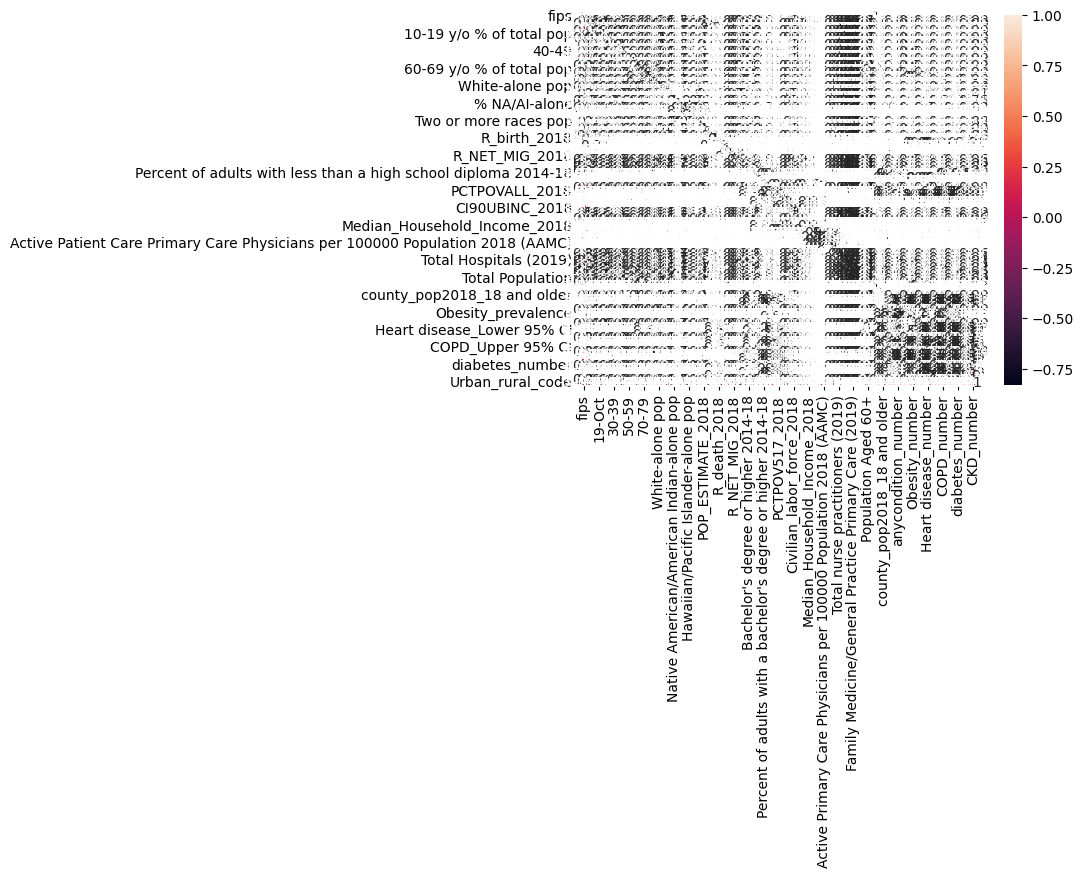

In [40]:
columntypes = data.dtypes
columnas_numericas = [c for c in list(columntypes[columntypes != "object"].index)]
sns.heatmap(data[columnas_numericas].corr(), annot = True)

plt.tight_layout()
plt.show()

#Como son muchas columnas, tomare solo las numericas y tomare como variable objetivo la prevalencia de Obesidad

In [41]:
data_c = data[columnas_numericas]
data_c.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [42]:
x = data_c.drop('Obesity_number', axis= 1)
y = data_c['Obesity_number']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [43]:
modeloLineal = LinearRegression()
modeloLineal.fit(X_train,y_train)

LinearRegression()

In [44]:
print(f"Intercepto (a): {modeloLineal.intercept_}")
print(f"Coeficientes (b): {modeloLineal.coef_}")

Intercepto (a): 54501.91281236526
Coeficientes (b): [ 7.47993330e-03  8.30147444e-02 -7.67416960e-02 -9.97171241e+01
  3.35039912e-01 -1.05422598e+02  1.37331114e-01 -7.25949630e+01
  4.17030457e-01 -5.58054186e+01 -1.75088979e-01  7.40694526e+01
  2.22424268e-01 -8.25075224e+01  4.07807052e-02 -5.76971419e+01
 -5.14501315e-01  2.30266163e+02 -3.03259666e-01  1.69409133e+02
  1.90835347e-02 -3.97970107e+01  3.75391981e-02 -5.28785101e+01
 -5.60890899e-02 -1.59379190e+01 -2.51235108e-02  1.81470531e+02
  2.20420055e-01 -9.11190022e+01 -1.12815523e-01  1.82619264e+01
  8.30148259e-02 -6.67984000e-01 -1.26366690e-01  3.33021010e+02
 -3.75429441e+02 -3.36834234e+02  1.25515997e+03  1.28469043e+03
 -1.27550383e+03 -1.02713442e-01 -2.93741305e-03 -2.06192296e-01
 -1.19332653e-01 -4.59701875e+02 -4.82165594e+02 -4.21760574e+02
 -4.56458451e+02 -9.64051378e-02  3.22189035e+01 -4.67296084e+01
  7.69297997e+01  4.70751914e-03  4.88316797e-02 -3.94166289e-02
  1.27388077e-01 -1.13153133e-01  2.40

In [45]:
y_predLineal = modeloLineal.predict(X_test)

In [46]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_predLineal)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_predLineal)}")

Error cuadrático medio: 4242635.829270367
Coeficiente de determinación: 0.9980597008542941


In [47]:
modeloLasso = Lasso(alpha = 0.1)
modeloLasso.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.261e+09, tolerance: 1.602e+09
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [48]:
score = modeloLasso.score(X_test, y_test)
print("Coefficients:", modeloLasso.coef_)
print("R2 score:", score)

Coefficients: [-3.08074588e-01  1.72964987e-01 -2.21405794e-02  7.46744865e+02
 -7.25720641e-02  9.07477127e+02 -7.19132701e-02  9.58180953e+02
  6.54267970e-02  8.71397066e+02  4.39394983e-02  9.18822224e+02
  1.53838141e-01  8.30060781e+02  9.90836622e-02  8.71205173e+02
  5.85803366e-02  9.34748422e+02  4.88469684e-02  9.42920668e+02
 -3.48655133e-02  4.02709840e+01  7.93965750e-03  2.77447935e+01
 -1.41260869e-02  4.20403624e+01 -1.47565921e-01  4.44250759e+02
  8.25972207e-01 -1.05951751e+02 -4.80165034e-01  1.53245949e+02
  2.25593505e-02  1.18341361e-01  1.76267290e-02 -4.89478070e+01
 -2.75039695e+01  9.90515154e+00  8.48220947e+01  3.05340101e+01
 -3.30470611e+01  3.77698622e-03  1.97748038e-01 -1.10071880e-01
 -9.07183171e-02 -3.05118271e+01 -8.64785938e+01  3.08390976e+01
 -3.95342660e+01  2.12917889e-01 -6.20496425e+01 -6.26925022e+01
  9.19558173e+01  8.26770853e-02 -2.55593184e-02  4.72372790e-02
  2.72336417e-02  3.78473470e-04 -2.10690985e-01 -3.47273676e+01
 -1.0364800

In [49]:
scores =[]
for i in range(0,21):
    Alpha=i
    modeloLassoiter = Lasso(alpha = Alpha)
    modeloLassoiter.fit(X_train, y_train)
    scores.append(modeloLasso.score(X_test, y_test))
scores

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.257e+09, tolerance: 1.602e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

[0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383,
 0.9959974919432383]

#Los dos modelos dieron un buen resultado pero el lineal estuvo un poco mejor
#Cambiando el alpha en el regularizado, no note ningub cambio. Dio exactamente el mismo resultado